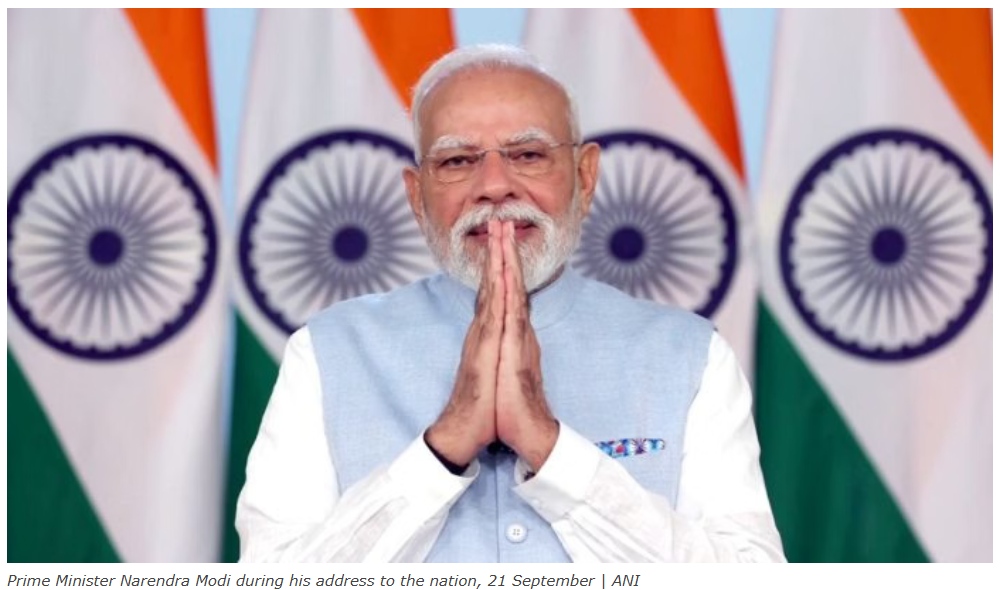

In [1]:
#!pip install nltk

import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go


import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
file_path = "D:\Data Science Classes\Projects Practice Dataset\speech.txt"
with open(file_path, "r", encoding="utf-8") as file:
    speech_text = file.read()
print(file_path)
print(speech_text)

D:\Data Science Classes\Projects Practice Dataset\speech.txt
“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”

“Many key legislations did not get the discussion they deserved as the opposition put politics above them”

“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”

“We have given the youth of India a government free of scams”

“Today a trust has arisen in the heart of the poor to fulfill his dreams”

“Opposition is not able to see the trust of people as they are so steeped in distrust”

“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”

“Opposition believes in changing names but they can’t change their work culture”

“Freedom fighters and founding fathers of the country always opposed dynasty politics”

“Crimes against women are unacceptable and the Central Government and the State

In [4]:
speech_text_cleaned = re.sub(r'[^\w\s]',' ', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words]
word_filtered

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 

In [5]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [6]:
# Lematization
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word)for word in word_filtered]
words_lemmatized

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 'manipur',

In [7]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores)/len(sentiment_scores)
average_sentiment = sum(sentiment_scores)/len(sentiment_scores)
average_sentiment

0.01488009950248756

In [8]:
sentiment_scores

[0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 -0.5719,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4767,
 0.4404,
 0.25,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.1531,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 0.0,
 -0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 -0.4215,
 -0.4588,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.3818,
 0.0,
 0.0,
 0.4019,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [9]:
average_sentiment

0.01488009950248756

In [10]:
len(sentiment_scores)

1608

In [11]:
sum(sentiment_scores)

23.927199999999996

In [25]:
#positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i]>0.1]
#negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i]<-0.1]
#neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [33]:
positive_words = [word for i, word in enumerate(words_lemmatized) if sentiment_scores[i]>0.1]
negative_words = [word for i, word in enumerate(words_lemmatized) if sentiment_scores[i]<-0.1]
neutral_words = [word for i, word in enumerate(words_lemmatized) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [34]:
print("The positive words are:", positive_words)

The positive words are: ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dream', 'trust', 'confidence', 'top', 'freedom', 'fighter', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'confidence', 'strength', 'confidence', 'lucky', 'confidence', 'blessing', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dream', 'strength', 'dream', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dream', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'party', 'faith', 'dwelled', 'fascination', 'freedom', 'fighter', 'dedicated', 'party', 'freebie'

In [28]:
print("The negative words are:", negative_words)

The negative words are: ['scam', 'poor', 'distrust', 'crime', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scam', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ill', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradiction', 'damage', 'suffered', 'victim', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crime', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [35]:
print("The neutral words are:", neutral_words)

The neutral words are: ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislation', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'year', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'belief', 'changing', 'name', 'change', 'work', 'culture', 'founding', 'father', 'country', 'always', 'opposed', 'dynasty', 'politics', 'woman', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mother', 'daughter', 'manipur', 'nation', 'stand', 'house', 'stand', 'government', 'leave', 'stone', 'unturned', 'manipur', 'get', 'back', 'track', 'development', 'government', 'given', 'first', 'priority', 'develop

# Visualization

In [36]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)
print(word_freq_positive)
print(word_freq_negative)
print(word_freq_neutral)

<FreqDist with 72 samples and 140 outcomes>
<FreqDist with 59 samples and 82 outcomes>
<FreqDist with 614 samples and 1386 outcomes>


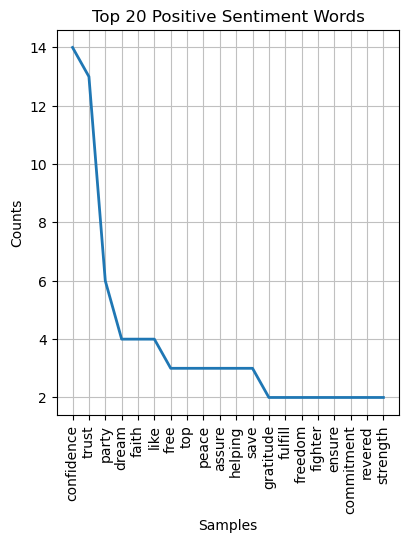

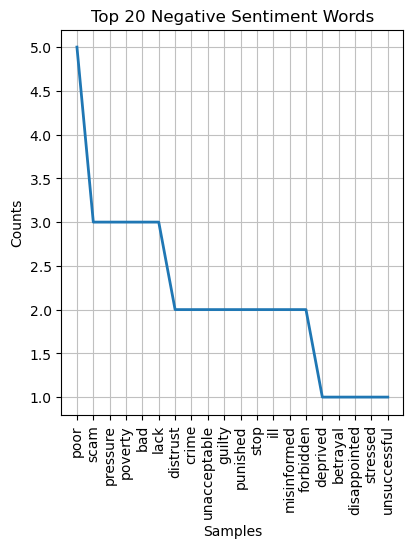

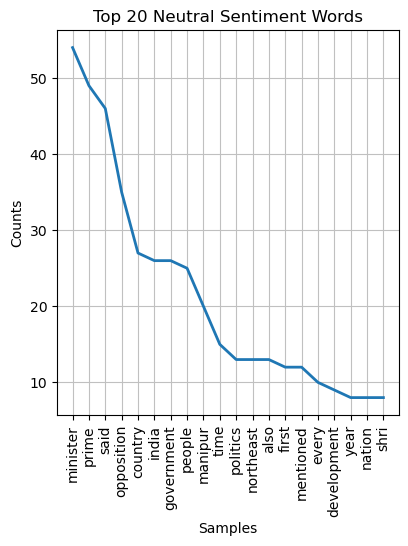

<Axes: title={'center': 'Top 20 Neutral Sentiment Words'}, xlabel='Samples', ylabel='Counts'>

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(131)
word_freq_positive.plot(20, title = "Top 20 Positive Sentiment Words")

plt.figure(figsize=(15,5))

plt.subplot(131)
word_freq_negative.plot(20, title = "Top 20 Negative Sentiment Words")

plt.figure(figsize=(15,5))

plt.subplot(131)
word_freq_neutral.plot(20, title = "Top 20 Neutral Sentiment Words")

In [37]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns = ['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns = ['Word', 'Frequency'])
df_neutral  = pd.DataFrame(word_freq_neutral.most_common(20), columns = ['Word', 'Frequency'])
print(df_positive)
print("**********"*5)
print(df_negative)
print("*********"*5)
print(df_neutral)
print("*********"*5)

          Word  Frequency
0   confidence         14
1        trust         13
2        party          6
3        dream          4
4        faith          4
5         like          4
6         free          3
7          top          3
8        peace          3
9       assure          3
10     helping          3
11        save          3
12   gratitude          2
13     fulfill          2
14     freedom          2
15     fighter          2
16      ensure          2
17  commitment          2
18     revered          2
19    strength          2
**************************************************
            Word  Frequency
0           poor          5
1           scam          3
2       pressure          3
3        poverty          3
4            bad          3
5           lack          3
6       distrust          2
7          crime          2
8   unacceptable          2
9         guilty          2
10      punished          2
11          stop          2
12           ill          2
13   misinf

In [41]:
fig_positive = px.bar(df_positive, x = 'Word', y='Frequency', title='Top 20 Positive Sentiment Words')
fig_negative = px.bar(df_negative, x = 'Word', y='Frequency', title='Top 20 Negative Sentiment Words')
fig_neutral = px.bar(df_neutral, x='Word', y = 'Frequency', title = 'Top 20 Neutral Sentiment Words')

fig_positive.show()
print()
fig_negative.show()
print()
fig_neutral.show()
print()

In [42]:
wordcloud_positive =WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_positive)
wordcloud_negative =WordCloud(width=800, height=400, background_color='blue').generate_from_frequencies(word_freq_negative)
wordcloud_neutral =WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_neutral)

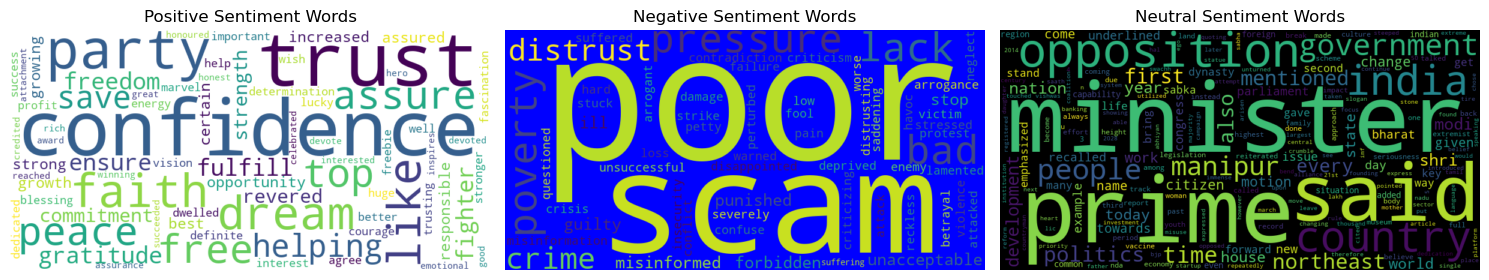

In [45]:
plt.figure(figsize=(15,5))


plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Positive Sentiment Words')

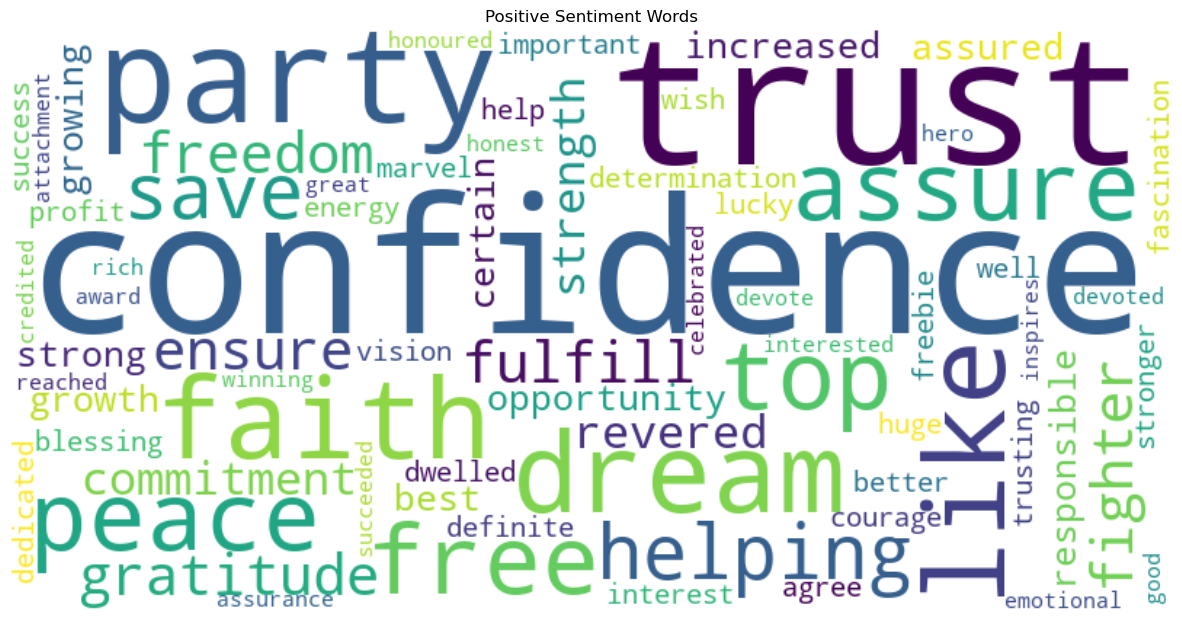

In [48]:
plt.figure(figsize= (15,20))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")

Text(0.5, 1.0, 'Negative Sentiment Words')

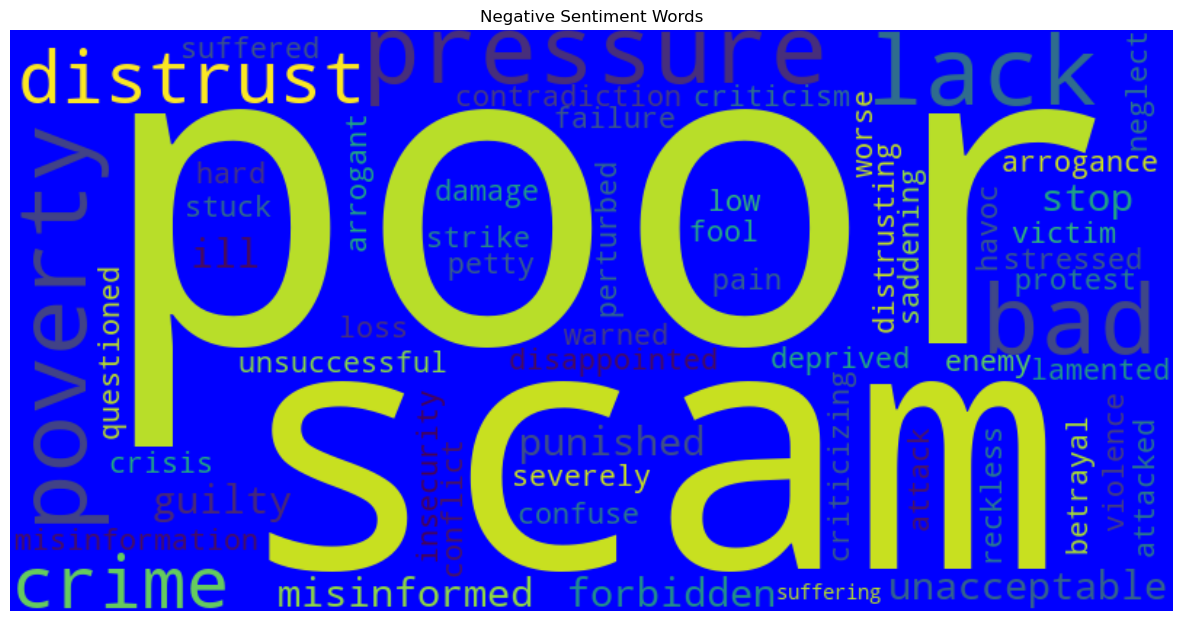

In [52]:
plt.figure(figsize= (15,20))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")

Text(0.5, 1.0, 'Neutral Sentiment Words')

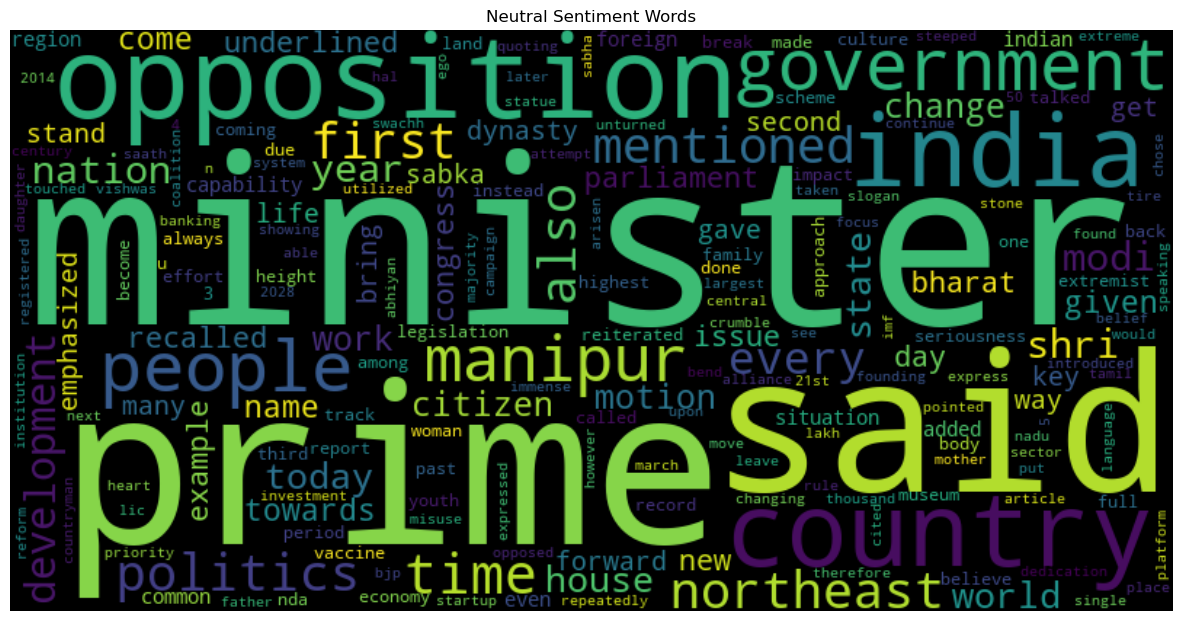

In [50]:
plt.figure(figsize= (15,20))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")